<a href="https://colab.research.google.com/github/ashkanmulla/Machine-Learning-Learning/blob/main/Project_81_Co2_emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#its changed or not?
#hello everyone
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [ ]:
co2=pd.read_excel("/content/drive/MyDrive/Copy of CO2 dataset.xlsx")
co2

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542
...,...,...
210,2010,15.60000
211,2011,15.60000
212,2012,14.80000
213,2013,14.70000


In [ ]:
co2.isnull().sum()

Year    0
CO2     0
dtype: int64

In [ ]:
co2.notnull().sum()

Year    215
CO2     215
dtype: int64

In [ ]:
co2.describe()

,Year,CO2
count,215.000000,215.000000
mean,1907.000000,6.741970
std,62.209324,6.522437
min,1800.000000,0.001750
25%,1853.500000,0.041050
50%,1907.000000,6.390000
75%,1960.500000,11.500000
max,2014.000000,18.200000


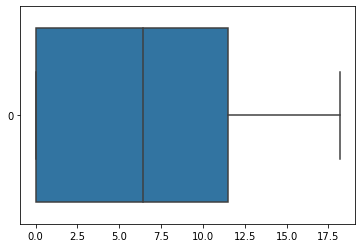

In [ ]:
sns.boxplot(data=co2['CO2'],orient="h")

<Figure size 1440x1152 with 0 Axes>

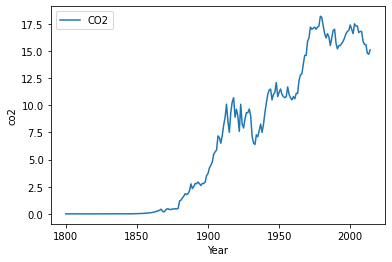

In [ ]:
plt.figure(figsize=(20,16))
co2.plot('Year','CO2')
plt.xlabel("Year")
plt.ylabel("co2")
plt.show()

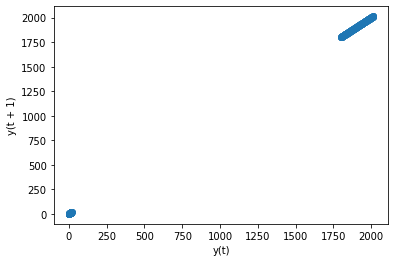

In [ ]:
from pandas.plotting import lag_plot
pd.plotting.lag_plot(co2, lag=1)

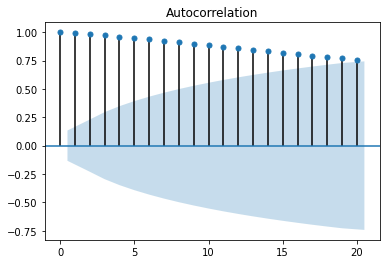

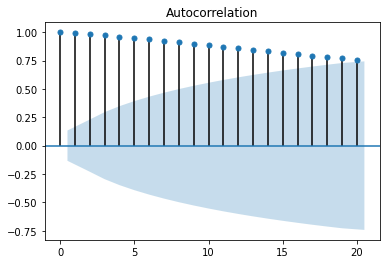

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
series = pd.read_excel('/content/drive/MyDrive/Copy of CO2 dataset.xlsx', header=0, index_col=0,parse_dates=True)
plot_acf(series,lags=20)

In [ ]:
dataset=pd.read_excel('/content/drive/MyDrive/Copy of CO2 dataset.xlsx')
dataset1=dataset.set_index(["Year"])
dataset1

,CO2
Year,
1800,0.00568
1801,0.00561
1802,0.00555
1803,0.00548
1804,0.00542
...,...
2010,15.60000
2011,15.60000
2012,14.80000


In [ ]:
#Determine rolling statistics
rolmean= dataset1.rolling(window=10).mean()

rolstd=dataset1.rolling(window=10).std()
print(rolmean,rolstd)

        CO2
Year       
1800    NaN
1801    NaN
1802    NaN
1803    NaN
1804    NaN
...     ...
2010  16.75
2011  16.61
2012  16.43
2013  16.15
2014  15.93

[215 rows x 1 columns]            CO2
Year          
1800       NaN
1801       NaN
1802       NaN
1803       NaN
1804       NaN
...        ...
2010  0.605989
2011  0.696738
2012  0.901912
2013  0.965229
2014  0.923821

[215 rows x 1 columns]


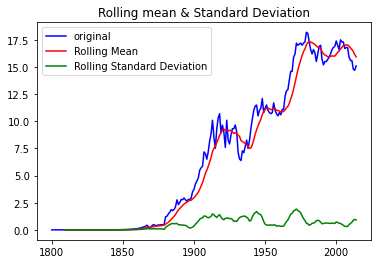

In [ ]:
#PLot rolling statistics:
orig=plt.plot(dataset1,color="blue",label="original")
mean=plt.plot(rolmean,color="red",label="Rolling Mean")
std=plt.plot(rolstd,color="green",label="Rolling Standard Deviation")
plt.legend(loc="best")
plt.title("Rolling mean & Standard Deviation")
plt.show(block=False)

In [ ]:
#perform Dickey fuller Test:
from statsmodels.tsa.stattools import adfuller

print("Result of Dickey-fuller Test:")
dftest=adfuller(dataset1["CO2"],autolag="AIC")

dfoutput=pd.Series(dftest[0:4],index=["Test Statstic","P-Value","#Lags Used","Number of observations Used"])
for key,value in dftest [4].items():
  dfoutput ["Critical Value (%s" %key]=value

print (dfoutput)

Result of Dickey-fuller Test:
Test Statstic                   -0.378463
P-Value                          0.913633
#Lags Used                       0.000000
Number of observations Used    214.000000
Critical Value (1%              -3.461282
Critical Value (5%              -2.875143
Critical Value (10%             -2.574020
dtype: float64


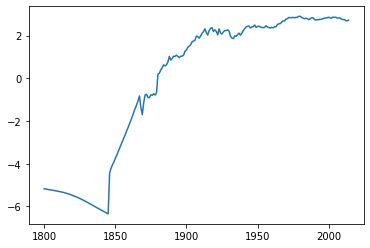

In [ ]:
#Estimating Trend
dataset_logscale=np.log(dataset1)
plt.plot(dataset_logscale)

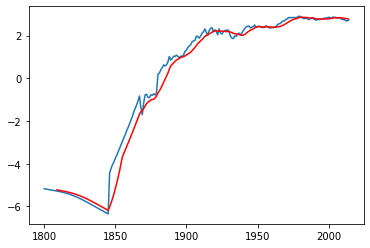

In [ ]:
#moving Average
movingAverage=dataset_logscale.rolling(window=10).mean()
movingSTD=dataset_logscale.rolling(window=10).std()
plt.plot(dataset_logscale)
plt.plot(movingAverage,color="red")

In [ ]:
ds=dataset_logscale-movingAverage
ds.head(10)

#Remove null values
ds.dropna(inplace=True)
ds.head(10)

,CO2
Year,
1809,-0.052777
1810,-0.054616
1811,-0.056489
1812,-0.058218
1813,-0.059980
1814,-0.063487
1815,-0.068621
1816,-0.073493
1817,-0.079916


In [ ]:
def test_stationary(timeseries):
  #Determine rolling statistics
  movingAverage= timeseries.rolling(window=10).mean()
  movingstd=timeseries.rolling(window=10).std()

  #PLot rolling statistics:
  orig=plt.plot(timeseries,color="blue",label="original")
  mean=plt.plot(movingAverage,color="red",label="Rolling Mean")
  std= plt.plot(movingSTD,color="green",label="Rolling Standard Deviation")
  plt.legend(loc="best")
  plt.title("Rolling mean & Standard Deviation")
  plt.show(block=False)

  #perform Dickey fuller Test:
  print("Result of Dickey-fuller Test:")
  dftest=adfuller(timeseries["CO2"],autolag="AIC")
  dfoutput=pd.Series(dftest[0:4],index=["Test Statstic","P-Value","#Lags Used","Number of observations Used"])
  for key,value in dftest [4].items():
    dfoutput ["Critical Value (%s" %key]=value
  print (dfoutput)

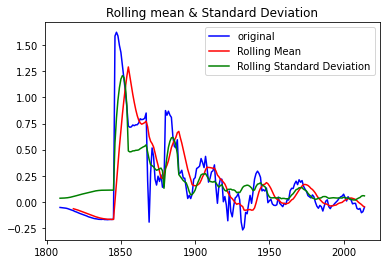

Result of Dickey-fuller Test:
Test Statstic                   -3.248746
P-Value                          0.017331
#Lags Used                       0.000000
Number of observations Used    205.000000
Critical Value (1%              -3.462658
Critical Value (5%              -2.875744
Critical Value (10%             -2.574341
dtype: float64


In [ ]:
test_stationary(ds)

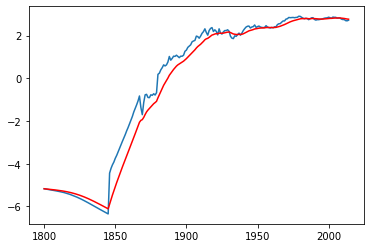

In [ ]:
weightedaverage=dataset_logscale.ewm(halflife=5,min_periods=0,adjust=True).mean()
plt.plot(dataset_logscale)
plt.plot(weightedaverage,color="red")

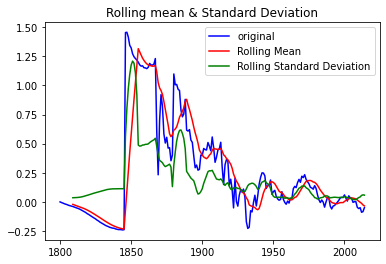

Result of Dickey-fuller Test:
Test Statstic                   -2.603649
P-Value                          0.092246
#Lags Used                       0.000000
Number of observations Used    214.000000
Critical Value (1%              -3.461282
Critical Value (5%              -2.875143
Critical Value (10%             -2.574020
dtype: float64


In [ ]:
ds1=dataset_logscale-weightedaverage
test_stationary(ds1)

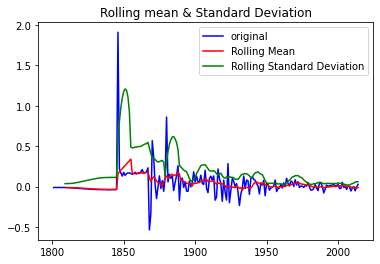

Result of Dickey-fuller Test:
Test Statstic                 -1.266898e+01
P-Value                        1.256588e-23
#Lags Used                     0.000000e+00
Number of observations Used    2.130000e+02
Critical Value (1%            -3.461429e+00
Critical Value (5%            -2.875207e+00
Critical Value (10%           -2.574054e+00
dtype: float64


In [ ]:
datasetlogdiffshifting=dataset_logscale-dataset_logscale.shift()
datasetlogdiffshifting.dropna(inplace=True)
test_stationary(datasetlogdiffshifting)